In [1]:
# thresholding method
import cv2

# Load image
image = cv2.imread("../data/men/2/2_men (1).JPG")


# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
threshold_value = 150
ret, binary = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

# Display results
cv2.imshow("Original image", image)
cv2.imshow("Thresholded image", binary)
cv2.waitKey(0)


-1

In [ ]:
# otsu's method
# otsu.py - Simple (and non-efficient) implementation of Otsu's method
#
# You can do with this code whatever you want. The main purpose is help
# people learning about this. Also, there is no warranty of any kind.
#
# Juan Miguel Valverde Martinez
# http://laid.delanover.com

import numpy as np
import cv2
from matplotlib import pyplot as plt


im = cv2.imread("../data/men/3/3_men (2).JPG")
im_red = im[:,:,0]
im_green = im[:,:,1]
im_blue = im[:,:,2]
im_flat_red = np.reshape(im_red,(im_red.shape[0]*im_red.shape[1]))
im_flat_green = np.reshape(im_green,(im_green.shape[0]*im_green.shape[1]))
im_flat_blue = np.reshape(im_blue,(im_blue.shape[0]*im_blue.shape[1]))

[hist_red, _] = np.histogram(im_red, bins=256, range=(0, 255))
[hist_green, _] = np.histogram(im_green, bins=256, range=(0, 255))
[hist_blue, _] = np.histogram(im_blue, bins=256, range=(0, 255))

# Normalization so we have probabilities-like values (sum=1)
hist_red = 1.0*hist_red/np.sum(hist_red)
hist_green = 1.0*hist_green/np.sum(hist_green)
hist_blue = 1.0*hist_blue/np.sum(hist_blue)

val_max = -999
thr_red = -1
thr_green = -1
thr_blue = -1
for t in range(1,255):
    # Non-efficient implementation
    q1 = np.sum(hist_red[:t])
    q2 = np.sum(hist_red[t:])
    m1 = np.sum(np.array([i for i in range(t)])*hist_red[:t])/q1
    m2 = np.sum(np.array([i for i in range(t,256)])*hist_red[t:])/q2
    val = q1*(1-q1)*np.power(m1-m2,2)
    if val_max < val:
        val_max = val
        thr_red = t
val_max = -999
for t in range(1,255):
    q1 = np.sum(hist_green[:t])
    q2 = np.sum(hist_green[t:])
    m1 = np.sum(np.array([i for i in range(t)])*hist_green[:t])/q1
    m2 = np.sum(np.array([i for i in range(t,256)])*hist_green[t:])/q2
    val = q1*(1-q1)*np.power(m1-m2,2)
    if val_max < val:
        val_max = val
        thr_green = t
val_max = -999
for t in range(1,255):
    q1 = np.sum(hist_blue[:t])
    q2 = np.sum(hist_blue[t:])
    m1 = np.sum(np.array([i for i in range(t)])*hist_blue[:t])/q1
    m2 = np.sum(np.array([i for i in range(t,256)])*hist_blue[t:])/q2
    val = q1*(1-q1)*np.power(m1-m2,2)
    if val_max < val:
        val_max = val
        thr_blue = t

print("Threshold: {}".format(thr_red))
print("Threshold: {}".format(thr_green))
print("Threshold: {}".format(thr_blue))


im_red[im_red < thr_red] = 0
im_blue[im_blue < thr_blue] = 0
im_green[im_green < thr_green] = 0

im[:,:,0] = im_red
im[:,:,1] = im_green
im[:,:,2] = im_blue
plt.imshow(im)



In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


im = cv2.imread("../data/men/3/3_men (2).JPG")
im = np.array((im[:,:,1] ** 2 + im[:,:,2] ** 2 +im[:,:,0]**2) ** 0.5, dtype=np.float64)
[hist, _] = np.histogram(im_red, bins=256, range=(0, 255))
hist = 1.0*hist/np.sum(hist)

val_max = -999
thr = -1
for t in range(1,255):
    # Non-efficient implementation
    q1 = np.sum(hist[:t])
    q2 = np.sum(hist[t:])
    m1 = np.sum(np.array([i for i in range(t)])*hist[:t])/q1
    m2 = np.sum(np.array([i for i in range(t,256)])*hist[t:])/q2
    val = q1*(1-q1)*np.power(m1-m2,2)
    if val_max < val:
        val_max = val
        thr = t

print("Threshold: {}".format(thr))



Threshold: 1


127.0 181.0 182.0


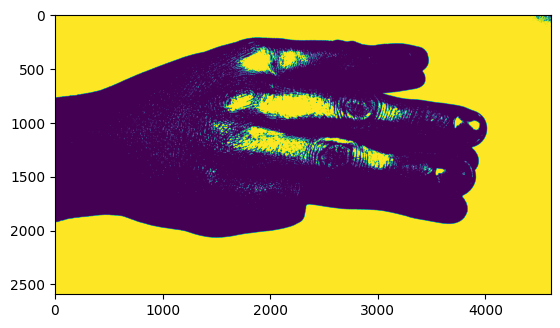

In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../data/men/3/3_men (4).JPG',cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print(ret1,ret2,ret3)
plt.imshow(th1)

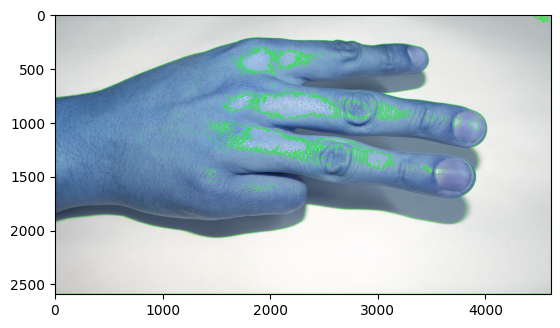

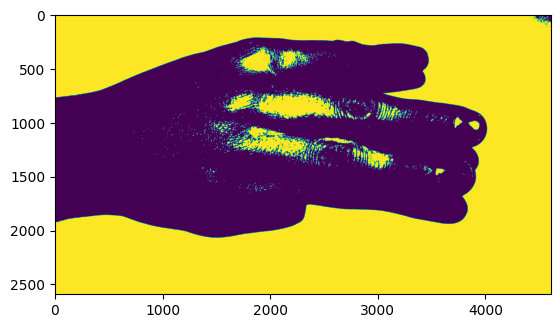

In [36]:
import cv2

# Load image
image = cv2.imread("../data/men/3/3_men (4).JPG")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Otsu's thresholding
ret, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply morphological opening
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Find contours
contours, hierarchy = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Display results
plt.imshow( image)
plt.show()
plt.imshow( opened)
plt.show()
# cv2.waitKey(0)
